# Can we predict the next eruption of Mount Rainier?
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Mount_Rainier_5845s.JPG/2880px-Mount_Rainier_5845s.JPG)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mount_Rainier_Hazard_Map-en.svg/1920px-Mount_Rainier_Hazard_Map-en.svg.png" style="float: right; height: 350px; padding: 0 0 0 15px;" />[Mount Rainier](https://en.wikipedia.org/wiki/Mount_Rainier), also known as Tahoma _([Twulshootseed for Mother of Waters](https://www.jstor.org/stable/40490298))_, has not erupted in more than 500 years. Because of its peak altitude, active hydrothermal system, and high seismicity, [volcanologists believe an event may be imminenet](https://economictimes.indiatimes.com/news/international/us/mount-rainier-volcano-why-volcanologists-are-worried-about-washington-peak/articleshow/111212875.cms?from=mdr). These concerns are compounded by Mount Rainier's potential for generating high-volume mudflows from its glacial mantle, containing more than five times the ice and snow of any other volcano in the Cascade Range within its 25 major glaciers. This and the proximity of its pyroclastic flow to densely populated metropolitan areas makes [Mount Rainier the most dangerous volcano in the United States](https://www.nationalgeographic.com/science/article/news-most-dangerous-volcano-mount-rainier-supervolcanoes-yellowstone) and one of the most potentially deadly in the entire world.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fc/Cascade_Volcanic_Arc.jpg" style="float: left; height: 350px; padding: 0 15px 0 0;" />The Cascade Range of North America is [home to two of the most dangerous volcanoes in the world](https://time.com/5300683/volcanoes-most-dangerous-active/). Mount Rainier is an active stratovolcano, one of 13 volcanos in the range, which was formed more than 30 million years ago through a process of subduction. When the Juan de Fuca Plate moved under the North American Plate, the collision of tectonic plates uplifted the crust, resulting in the formation of the mountain range. The [Cascadia subduction zone](https://en.wikipedia.org/wiki/Cascadia_subduction_zone), a 600 mi (960 km) fault, is thought to be [one of the most potentially dangerous earthquake sources in the world](https://www.newyorker.com/magazine/2015/07/20/the-really-big-one), making studying this area's seismicity incredibly important for disaster prevention aside from its volcanism. 

While [we cannot predict earthquakes](https://time.com/4464118/italy-earthquake-seismologist-explains-why-common/), we can study them and their impact on their environments. Some of the most valuable study of geology, and especially seismology, is the ability to use patterns in signals in seemingly disparate places and events to understand how energy cascades through our planet and how it translates to other geologic events. Seismological tools traced [tremors in the San Andreas Fault to an earthquake on the other side of the world in the Indian Ocea](https://www.washington.edu/news/2008/12/10/great-indian-ocean-earthquake-of-2004-set-off-tremors-in-san-andreas-fault/)n in 2004. By studying activity in the seismic activity around volcanic eruptions in the Cascade Range, we may be able to identify risk signals for a Mount Rainier eruption, potentially saving millions of lives. 

# Cascade Range eruptions
<img src="https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/full_width/public/vhp_img1052.jpg" style="float: right; height: 500px; padding: 0 0 0 15px;" />Volcanoes in this range have been erupting at about a rate of 2 per century for the last 500,000 years. Looking at the activity within the range in the past can help us narrow down our search for data to analyze. While we have observed thousands of years' worth of eruptions, we've only been recording seismic waves for the last century, at facilities like [Caltech's Seismo Lab](https://www.caltech.edu/about/news/caltechs-seismo-lab-celebrates-100-years-at-the-forefront-of-earthquake-science). This limits the data we have to about 7 volcanos out of 13, including most of the ones located in Oregon.

Even though the potential of a century's worth of data is promising, most of the data we have to explore from IRIS in is much younger than that,limiting us to about the last 40 years. This is a natural filter for seismology we can study around volcanoes, but still could help us differentiate between activity. The only volcano that has erupted in the Cascade Range in the last 100 years is Mount St. Helens—which has had two periods of recorded eruption periods in the last 40 years. The 1980 eruption, which triggered the largest landslide in recorded history, [is considered the most disastrous volcanic event in United States history](https://earthsky.org/earth/this-date-in-science-cataclysmic-eruption-at-mount-st-helens/) and is still causing destruction today. The volcano was active several times in the preceding century, including 1940-1950, and 24 years after the 1980 eruption, it experienced another period of eruptions.

# Nearby recent volcanic activity
Since the availability of recorded data around a volcano in this area is limited to Mount St. Helens, we can look at nearby neighbors. [Axial Seamount](https://en.wikipedia.org/wiki/Axial_Seamount) is located on the edge of Juan de Fuca plate off the coast of Oregon. Its last eruption was in 2015, [and predicted](https://www.nature.com/articles/s41598-020-67043-0). It has also had several other events over the course of the last 40-50 years. We can also explore seismic activity geographically nearby that may be temporally related to activity near Mount St. Helens, to explore relationships between such events for correlation and causation.

Now that we have our areas of data we want to explore, we can setup our notebook to run code.

# Setup
In the first code block we will import the packages we need from python.

In [106]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

# Request the data

The next code block will set the variables for our catalog search in IRIS and make a request for the data. Since we want to know what seismic activity looks like around volcanic eruptions, we will start with Mount St. Helens. We'll start with a wide range that covers recorded seismicity across both active periods of eruption so we can see if there's any obvious signs leading up to both eruption periods.

_This can take a few minutes to complete if the number of events being requested is large._

In [91]:
startt = UTCDateTime("1964-01-01")
endt = UTCDateTime("2024-08-01")
maxrad = 1.0 # 1.0 degree radial search, ≈50 miles
minmag = 0.5 # Minimum magnitude-0.5
lat = 46.12
lon = -122.11

cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag)

# Plot the data

The data returned from the catalog needs to be changed in order to be useful to our needs. The next code block will loop over each event, and copy the times and magnitudes of the returned events into their respective lists. It will then generate a figure of a plot that shows the magnitude of all earthquakes in the catalog over time.

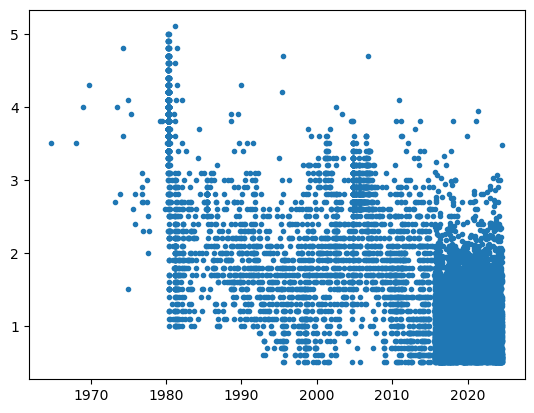

In [93]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)

# Reformat the times for Matlab
mtimes = mdates.date2num(times)

events = [mtimes, mags]

fig1 = plt.subplots(1,1)

plt.plot_date(events[0],events[1],'.')
plt.show()

While it looks like seismic activity suddenly jumped from low activity in 1980, however, the [University of Washington's Seismology Lab and the Pacific Northwest Seismic Network](https://www.washington.edu/research/research-centers/pacific-northwest-seismic-network/) was not established until 1969, after a devastating earthquake in 1965. It was heavily expanded over the late 1970s, and by early 1980, the capabilities were advanced enough that [seismologists predicted an eruption of Mount St. Helens was imminent in the two months leading up to the event](https://www.seismosoc.org/news/pre-eruption-seismograms-recovered-for-1980-mount-st-helens-event/). Unfortunately, the potential damage of the eruption was not well understood, and the declared disaster zone was much too small. [57 people lost their lives](https://www.theatlantic.com/photo/2015/05/the-eruption-of-mount-st-helens-in-1980/393557/).

During the second period of activity, there is another clear spike in actvity. One thing to notice is that the activity below around magnitude 2.6-2.7 is relatively active in this period ongoing. Let's take a closer look at the two active periods using a histogram.

# Filter the data

The next code block will filter our data to two periods, the first covering the 1980 eruption from six months prior to the eruption and the day of. The second period will cover the six months preceding the 2004 activity up until its final 2008 lava dome.

In [94]:
eruption_one = [[],[]]
for index, time in enumerate(times):
    if time >= UTCDateTime("1979-12-18") and time <= UTCDateTime("1980-05-18"):
        eruption_one[0].append(mdates.date2num(time))
        eruption_one[1].append(mags[index])

eruption_two = [[],[]]
for index, time in enumerate(times):
    if time >= UTCDateTime("2003-04-01") and time <= UTCDateTime("2008-07-10"):
        eruption_two[0].append(mdates.date2num(time))
        eruption_two[1].append(mags[index])

# 1980 eruption histogram 

The next code block will split the events per day and graph them into a histogram.

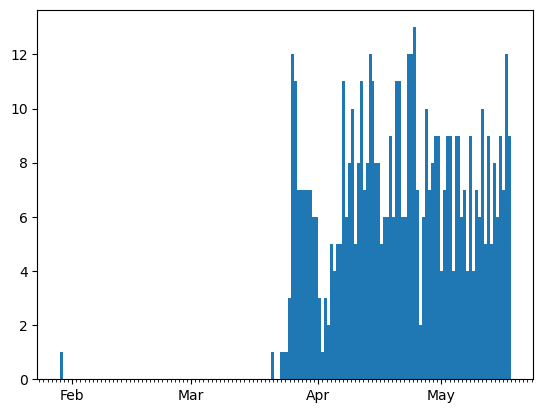

In [95]:
fig2, axes = plt.subplots(1,1)

days = int((UTCDateTime("1980-05-18") - UTCDateTime("1979-12-18"))/60/60/24)

axes.hist(eruption_one[0], bins=days) # days between Dec 18 1979 and May 5 1980
axes.xaxis.set_major_locator(mdates.MonthLocator())
axes.xaxis.set_minor_locator(mdates.DayLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

On March 20, 1980, a magnitude-4.2 earthquake arrived at the north flank of Mount St. Helens. The first phreatic eruption began 7 days later, on March 27. We can see an earthquake swarm began on March 22, peaking on March 25, and a continued steady flow of earthquake activity up through the eruption. The earthquakes in January and February may also be of interest, so let's look back at the magnitudes represented here.

We are going to plot again by magnitude this same window of events in the next code block.

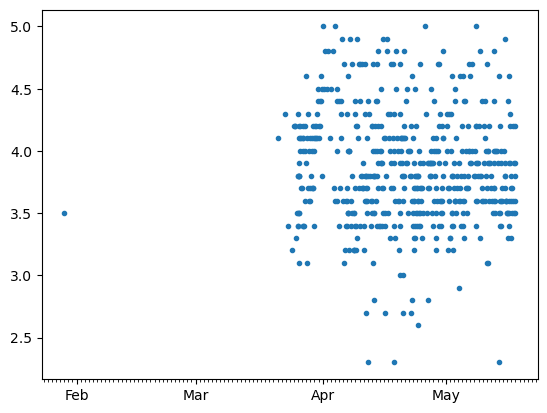

In [96]:
fig3, axes = plt.subplots(1,1)

plt.plot_date(eruption_one[0],eruption_one[1],'.')
axes.xaxis.set_major_locator(mdates.MonthLocator())
axes.xaxis.set_minor_locator(mdates.DayLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

The January 29 magnitude-3.5 earthquake may pose significance previously unaddressed. Overall, we see that for the two-month period prior to the eruption, the seismic swarm was composed mainly of earthquakes between magnitude-3.0 and 5.0. There was less activity between 2 and 3. Let's take a look at the longer period of volcanic unrest between 2004 and 2008 before we look at specific earthquakes of interest from the 1980 eruption.

# 2004—2008 eruption histogram

The next code block will split the events per month and graph them into a histogram.

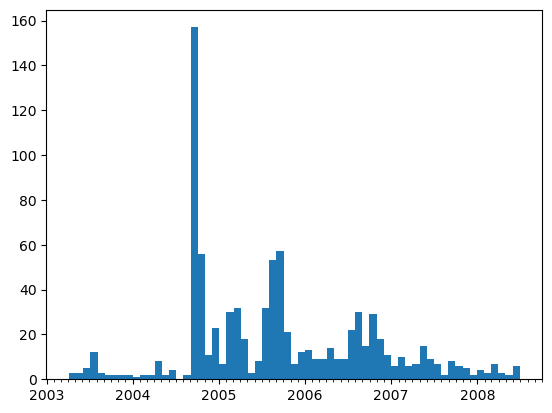

In [97]:
fig4, axes = plt.subplots(1,1)

months = int((UTCDateTime("2008-07-10") - UTCDateTime("2003-04-01"))/60/60/24/365 * 12)

axes.hist(eruption_two[0], bins=months) # months between Apr 1 2003 and July 7 2008
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_minor_locator(mdates.MonthLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

On October 1, 2004, Mount St. Helens experienced its first phreatic eruption since 1980. Steam eruptions began again on March 8, 2005, December 19, 2006, and its final release of steam was on January 16, 2008. 

In September 2004, there were a significant number of events. Following the release, the activity was not sustained as it was with the 1980 eruption, but instead, activity gradually lowered over time, never reaching a similar swarm as the beginning of the volcanic unrest.

Let's take a look at the magnitudes again, to see if there are any signals of interest.

We are going to plot again by magnitude this same window of events in the next code block.

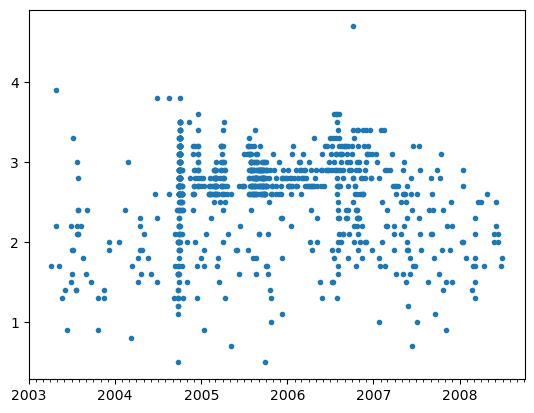

In [98]:
fig5, axes = plt.subplots(1,1)

plt.plot_date(eruption_two[0],eruption_two[1],'.')
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_minor_locator(mdates.MonthLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

There were three earthquakes above magnitude-3.5 leading up to the 2004 eruption event. There is one outlier in late 2006 near magnitude-4.0, but it doesn't correspond to any steam plume, and we know activity had continued to die down at that point. Similarly to the 1980 eruption, there was sustained seismicity swarming around magnitude-3.0, but in 1980, the magnitudes were overall higher, reaching up into magnitude-5.0. Still, the 2004 earthquakes leading up to the eruption may be important.

Let's take a look a closer look at when those earthquakes occured in 2004.

In the next code block, we'll filter the data from these events one more time and plot them.

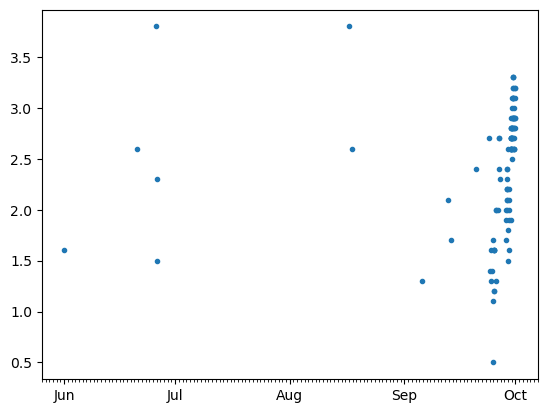

In [99]:
eruption_two_a = [[],[]]
for index, time in enumerate(times):
    if time >= UTCDateTime("2004-06-01") and time <= UTCDateTime("2004-10-1"):
        eruption_two_a[0].append(mdates.date2num(time))
        eruption_two_a[1].append(mags[index])

fig5, axes = plt.subplots(1,1)

plt.plot_date(eruption_two_a[0],eruption_two_a[1],'.')
axes.xaxis.set_major_locator(mdates.MonthLocator())
axes.xaxis.set_minor_locator(mdates.DayLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

Just like with the 1980 eruption, the week before the first phreatic eruption, there was an earthquake above magnitude-2.5 with a few beginning a swarm period up to the event. There were also some earthquakes above magnitude-2.0. While there were significantly more events in this set of data than in the 1980 set, that is more likely because of the advancement of technology and data availability than a representation of higher seismicity. Still, the June 25 and August 18 magnitude-3.8 earthquakes may have some significance.

Let's explore other activity that may be temporaly and geographically related to the 1980 seismicity around Mount St. Helen's eruption.

In the next code block, we'll gather data for a two-day window around the significant events in 1980: the January 29 and February 4 earthquakes, and the March 20 earthquake, which was followed by seismic swarming and doming that led to the prediction of the eruption that followed. We will plot the catalog on an orthographic map projection to identify the earthquakes of geographic interest.

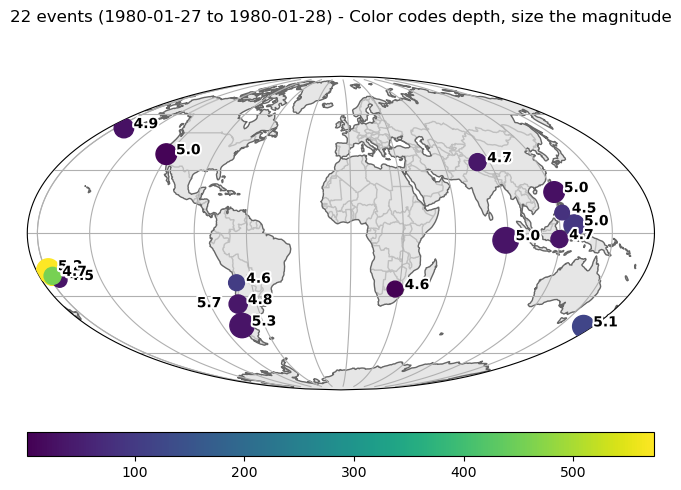

In [100]:
startt_two = UTCDateTime("1980-01-27")
endt_two = UTCDateTime("1980-01-29")
minmag = 4.5 # Minimum magnitude-4.5

cat_two = client.get_events(starttime=startt_two, endtime=endt_two, minmagnitude=minmag)

fig6 = cat_two.plot(kind=[['local']])

There are two nearby significant events: one on the Denali fault line in Alaska and another along the San Andreas fault line in California.

In late January 1980, the Lawrence Livermore National Laboratory suffered more than $10 million in damage due to [a series of magnitude-5.0 and greater earthquakes](https://pubs.usgs.gov/of/1980/0714/report.pdf). The mainshock of magnitude-5.9 occured on January 24 10.5 mi (17 km) north of Livermore, California. At least 600 aftershocks were recorded in the area, including [8 shocks with magnitudes greater than 4.0 through February 5](https://doi.org/10.1785/BSSA0710020451). On January 27, at 02:33 UTC, a magnitude-5.6 aftershock was recorded. 

Two-and-half hours later, a magnitude-4.9 earthquake was recorded in the Aleutian Islands, Alaska. The Aleutian Islands would go on to experience more than 30 magnitude-4.0 or greater earthquakes for the following two months, culminating in [a magnitude-6.9 earthquake on March 24 at 03:59 UTC](https://earthquake.usgs.gov/earthquakes/eventpage/usp0001668/impact) and several large aftershocks, including a magnitude-6.1 aftershock less than 3 minutes later. Large quakes in the islands would persist through May.

[Seismic waves can trigger remote tremors](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2008JB006049). In 2002, a magnitude-7.9 earthquake in Denali, Alaska, triggered tremors along the San Andreas fault line, and in 2009, a magnitude-9.2 earthquake in Sumatra, Indonesia, triggered tremors in the Cascadia Subduction Zone. 

Remote stress from two nearby fault events could be related to increasing seismicity near Mount St. Helens, and its eruption shortly afterward. 

# Re-examine Mount St. Helens area seismicity

In the next block, we will filter our activity from early around the January events in California and the March events in Alaska. Since we already know the IRIS catalog had little activity in this period, we're going to check USGS, where I found data about the Livermore and Aleutian Islands earthquakes.

_This can take a few minutes to load if the request is large._

In [140]:
client_usgs = Client("USGS")

startt = UTCDateTime("1980-01-24")
endt = UTCDateTime("1980-02-26") # Span the Livermore 33 day period
maxrad = 1.0 # 1.0 degree radial search, ≈50 miles
minmag = 0.5 # Minimum magnitude-0.5
lat = 46.12
lon = -122.11

cat_usgs = client_usgs.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag)

In the next code block, we're going to use Cartopy to draw a map of Washington to visualize the earthquakes in the vicinity and a histogram to show the cooresponding dates.

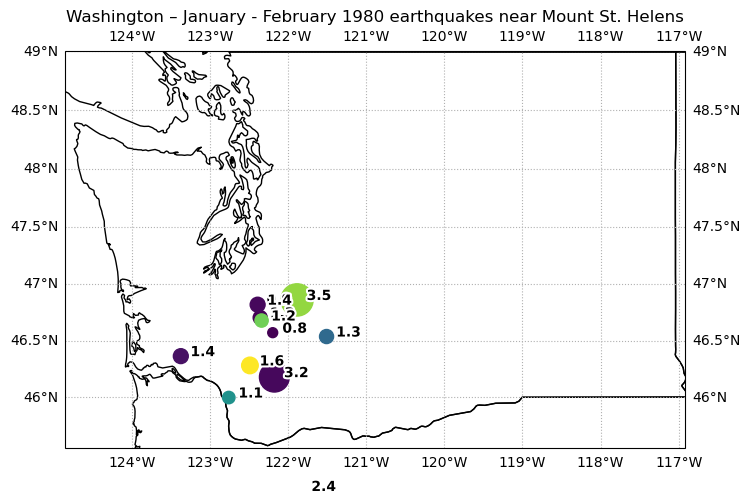

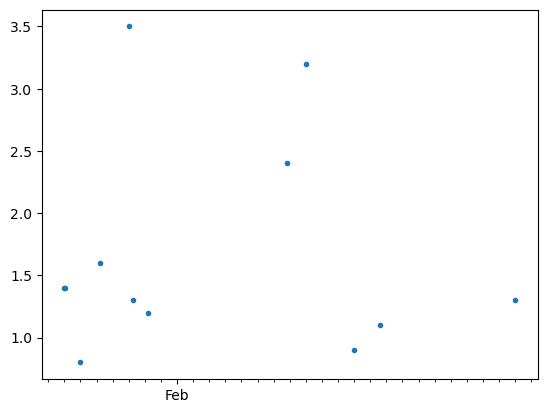

In [142]:
import cartopy.crs as ccrs 
import cartopy.feature as cf                

# Make a Mercator projection of Washington State
WASHINGTON_BOUNDS = [-124.849,-116.9156,45.5435,49.0024]
projection = projection = ccrs.Mercator()
fig7 = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=projection)
ax.set_extent(WASHINGTON_BOUNDS)
ax.set_title("Washington – January - February 1980 earthquakes near Mount St. Helens")
ax.add_feature(cf.STATES)
gl = ax.gridlines(linestyle=":", draw_labels=True)

# Plot the earthquakes on the map
cat_usgs.plot(fig=fig7, show=False, title="", colorbar=False)
plt.show()

# Filter the times and magnitudes for the histogram
times_usgs = []
mags_usgs = []
for event in cat_usgs:
    times_usgs.append(event.origins[0].time.datetime)
    mags_usgs.append(event.magnitudes[0].mag)

# Reformat the times for Matlab
events_usgs = [mdates.date2num(times_usgs), mags_usgs]

# Make the histogram
fig8, axes = plt.subplots(1,1)

plt.plot_date(events_usgs[0],events_usgs[1],'.')
axes.xaxis.set_major_locator(mdates.MonthLocator())
axes.xaxis.set_minor_locator(mdates.DayLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

On January 24, 1980, at just before 19:00 UTC, the Livermore earthquakes began and continued mostly uninterrupted for the following 16 hours. Two 1.4-magnitude earthquakes were recorded near Mount St. Helens, one to the west and one to the north, near Mount Rainier, shortly afterward. And according to a wider search of the area, there were others—[especially concentrated near the junction of the Cascadian Subduction Zone and the San Andreas fault line](https://ds.iris.edu/ieb/index.html?format=text&nodata=404&starttime=1980-01-23&endtime=1980-02-04&orderby=mag-desc&src=usgs&limit=25000&maxlat=41.742&minlat=39.296&maxlon=-122.324&minlon=-127.839&sbl=1&pbl=1&zm=7&mt=ter).

Just 20 minutes after the Aleutian Islands, Alaska, earthquake on January 27, a magnitude-1.6 earthquake was recorded near Mount St. Helens at 05:20 UTC. Livermore had a magnitude-3.0 event just 5 minutes prior.

On Feburary 9, at 00:28 UTC, a magnitude-3.2 earthquake was recorded within Mount St. Helens. There was still ongoing activity in Livermore, but there was also a magnitude-3.9 earthquake recorded off the coast of California on the Mendocino fault line.

Seismic activity carried on intermittently in the area between less than 1.0 and 2.0 magnitude through the end of Feburary and into early March.

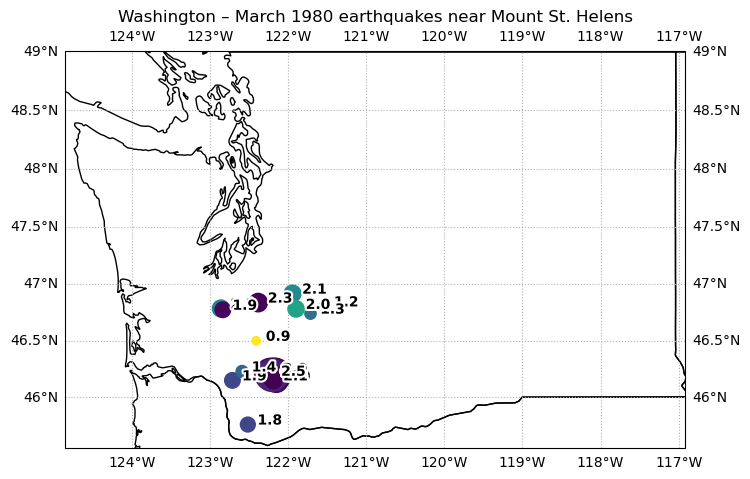

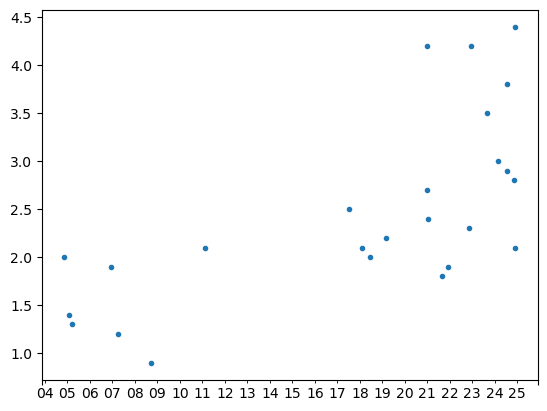

In [150]:
startt = UTCDateTime("1980-03-01")
endt = UTCDateTime("1980-03-25") # Span the Livermore 33 day period
maxrad = 1.0 # 1.0 degree radial search, ≈50 miles
minmag = 0.5 # Minimum magnitude-0.5
lat = 46.12
lon = -122.11

cat_usgs_two = client_usgs.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag)

# Filter the times and magnitudes for the histogram
times_usgs_two = []
mags_usgs_two = []
for event in cat_usgs_two:
    times_usgs_two.append(event.origins[0].time.datetime)
    mags_usgs_two.append(event.magnitudes[0].mag)

# Reformat the times for Matlab
events_usgs_two = [mdates.date2num(times_usgs_two), mags_usgs_two]

fig9 = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=projection)
ax.set_extent(WASHINGTON_BOUNDS)
ax.set_title("Washington – March 1980 earthquakes near Mount St. Helens")
ax.add_feature(cf.STATES)
gl = ax.gridlines(linestyle=":", draw_labels=True)

# Plot the earthquakes on the map
cat_usgs_two.plot(fig=fig9, show=False, title="", colorbar=False)
plt.show()

# Make the histogram
fig10, axes = plt.subplots(1,1)

plt.plot_date(events_usgs_two[0],events_usgs_two[1],'.')
axes.xaxis.set_major_locator(mdates.MonthLocator())
axes.xaxis.set_minor_locator(mdates.DayLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter(''))
axes.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
plt.show()

While the recorded activity was still relatively limited, it was increasing prior to the typically noted March 20 magnitude-4.2 earthquake. Perhaps more importantly, those smaller earthquakes correspond to larger quakes elsewhere.

On March 3, at 14:17 UTC, a magnitude-5.1 earthquake was recorded off the coast of California where the Cascadia Subduction Zone, the San Andreas fault line, and the Mendocino fault line meet. During the same time frame, Denali area earthquakes of magnitudes 3.5 and higher were ramping up. Along the San Andreas fault line, seismic activity was also increasing heavily, though lower in magnitude.

So what does March 20 look like globally?

The next code block will look for other events nearby in time and plot them on a map.

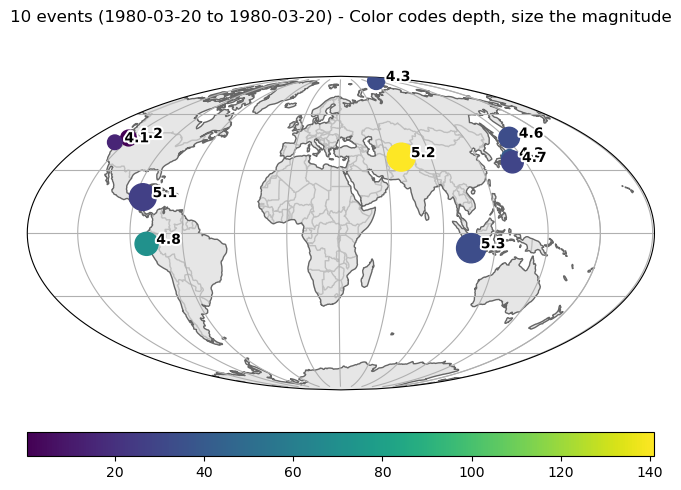

In [155]:
startt_three = UTCDateTime("1980-03-20")
endt_three = UTCDateTime("1980-03-21")
minmag = 4.0 # Minimum magnitude-4.0

cat_usgs_three = client_usgs.get_events(starttime=startt_three, endtime=endt_three, minmagnitude=minmag)

fig11 = cat_usgs_three.plot()

At 15:24 UTC on March 20, several hours before the magnitude-4.2 earthquake considered the beginning of the eruption of Mount St. Helens, there was a magnitude-4.1 earthquake off the coast of Oregon, just south east of Axial Seamount. Seismic activity remained steady and growing along the San Andreas fault, the Mount St. Helens vicinity, and the Denali fault for the next week until the peak in the Aleutian Islands on March 24 and the continued rumblings there, a magnitude-5.2 earthquake near the Axial Seamount on March 30, and the eventual eruption of Mount St. Helens.

# September 2004 seismic activity

Preceding the September 23, 2004, earthquake considered the start of the 2004-2008 volcanic unrest at Mount St. Helens, we find the same pattern. Heavy seismic activity along the Denali and San Andreas Fault lines, including a magnitude-6.2 earthquake in Alaska, a magnitude-4.0 earthquake near the Axial Seamount, and a magnitude-5.4 earthquake in California.